In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [5]:
df = pd.read_csv('/Users/alikhansainov/Desktop/Python/ML-project/Telecust1.csv.xls')
df.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [9]:
df['custcat'].value_counts()

custcat
C    281
A    266
D    236
B    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

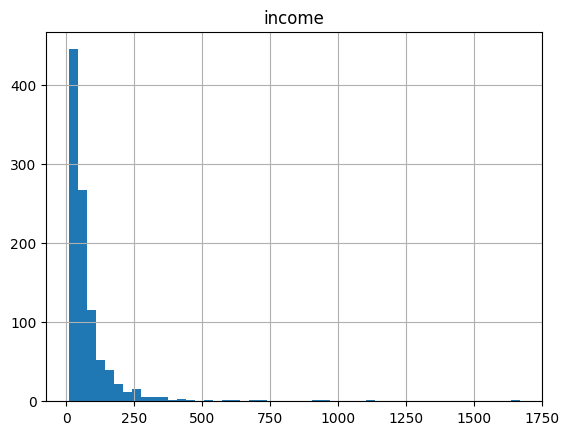

In [19]:
df.hist(column='income', bins=50)

In [20]:
df.columns

Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [32]:
X = df[['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]

y = df['custcat'].values
y[0:5]

array(['A', 'D', 'C', 'A', 'C'], dtype=object)

In [30]:
# Normalize data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]



array([[-0.02696767, -1.055125  ,  0.18450456, -0.12650641,  1.0100505 ,
        -0.25303431,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  0.54644972,  1.0100505 ,
        -0.4514148 ,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  0.35951747,  1.0100505 ,
         1.23481934, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.41625141, -0.9900495 ,
         0.04453642, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797, -0.44429125,  1.0100505 ,
        -0.25303431, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 4)
print ('Train set: ', X_train.shape, y_train.shape)
print ('Test set: ', X_test.shape, y_test.shape )

Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [34]:
# classification - k nearest neighbour (KNN)

from sklearn.neighbors import KNeighborsClassifier


In [50]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [51]:
# prediction 
yhat = neigh.predict(X_test)
yhat[0:5]

array(['C', 'A', 'C', 'D', 'D'], dtype=object)

In [52]:
#accuracy evaluation

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5575
Test set Accuracy:  0.26


In [53]:
# Try with a higher k value
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.4975
Test set Accuracy:  0.29


In [54]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.27 , 0.31 , 0.275, 0.26 , 0.3  , 0.29 , 0.345, 0.33 , 0.32 ])

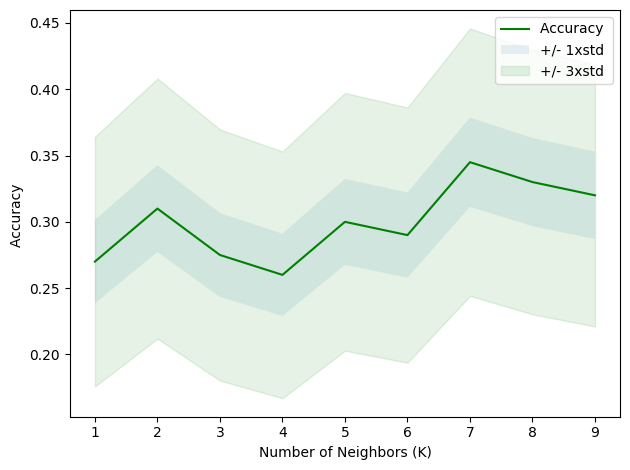

In [55]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [56]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.345 with k= 7
